In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [27]:
df=pd.read_csv("/content/Titanic-Dataset.csv")


In [28]:
# Display the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Pa

In [29]:
# Fill missing values in 'Age' with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing values in 'Embarked' with the most common port
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Fill missing values in 'Fare' with the median fare
df['Fare'].fillna(df['Fare'].median(), inplace=True)

# Drop 'Cabin' due to too many missing values
df.drop(columns=['Cabin'], inplace=True)

# Create a new feature 'FamilySize'
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Create a new feature 'IsAlone'
df['IsAlone'] = 1  # initialize to yes/1 is alone
df['IsAlone'].loc[df['FamilySize'] > 1] = 0  # now update to no/0 if family size is greater than 1

# Create a new feature 'Title' from 'Name'
df['Title'] = df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

# Simplify titles
df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr',
                                   'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Drop columns that are not needed
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

# Convert categorical columns to numerical using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

df.head()

<ipython-input-29-475511a56fe2>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IsAlone'].loc[df['FamilySize'] > 1] = 0  # now update to no/0 if family size is greater than 1


,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Title_the Countess
0,0,3,22.0,1,0,7.2500,2,0,True,False,True,False,True,False,False,False
1,1,1,38.0,1,0,71.2833,2,0,False,False,False,False,False,True,False,False
2,1,3,26.0,0,0,7.9250,1,1,False,False,True,True,False,False,False,False
3,1,1,35.0,1,0,53.1000,2,0,False,False,True,False,False,True,False,False
4,0,3,35.0,0,0,8.0500,1,1,True,False,True,False,True,False,False,False


In [30]:
# Select relevant features and the target variable

X = df.drop(columns=['Survived'])
y = df['Survived']


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [34]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
# Use a RandomForestClassifier
model = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
print(f'Best Parameters: {grid_search.best_params_}')

# Train the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)



Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


RandomForestClassifier(max_depth=30, min_samples_leaf=4, min_samples_split=10)

In [38]:
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')



Accuracy: 0.8324022346368715
Confusion Matrix:
[[93 12]
 [18 56]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       105
           1       0.82      0.76      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



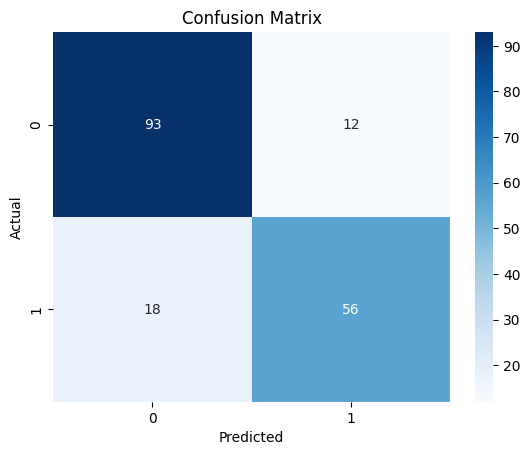

In [39]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
